In [6]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from categories import store_categories
import random
import numpy as np
import seaborn as sns
from dashboard import get_df_ready

ImportError: cannot import name 'get_df_ready' from 'dashboard' (c:\Users\gmspr\Documents\School\Senior\Fall 2023\STAT 386\project\personal-budget-tool\dashboard.py)

In [106]:
%load_ext autoreload
%autoreload 2
%run scraper.py
from scraper import BankScraper

with open("username") as file:
    username = file.read()

with open("password") as file:
    password = file.read()


scraper = BankScraper()
scraper.login(username, password)
df = scraper.getAccountTransactions()
scraper.logout()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
df

,date,description,amount,balance,account,category
0,2023-11-15,SMITHS FOOD #4136 PROVO U,13.34,1182.55,Credit Card,Groceries
1,2023-11-15,GUSTO DES:PAY 299761 ID:6semjvkdmlj INDN:Linds...,2685.36,8652.17,Checking,Deposit
2,2023-11-14,SMITHS FOOD #4136 PROVO U,14.76,1169.21,Credit Card,Groceries
3,2023-11-13,WM SUPERCENTER #3208 SPRINGVILLE U,91.18,3818.46,Credit Card,Groceries
4,2023-11-13,Online Banking payment to CRD 9258 Confirmatio...,-2713.50,6008.21,Checking,Transfer
...,...,...,...,...,...,...
235,2023-07-24,4TE*CITY OF PROVO UT PROVO U,12.00,1022.96,Credit Card,Other
236,2023-07-24,CHICK-FIL-A #03304 PROVO U,26.09,851.86,Credit Card,Fast Food
237,2023-07-24,SMITHS FOOD #4136 PROVO U,15.59,894.71,Credit Card,Groceries
238,2023-07-22,SHELL OIL12509240011 PROVO U,61.16,825.77,Credit Card,Gas


In [48]:
def make_dummy_data():
    dummy = pd.DataFrame()
    dummy['date'] = pd.date_range('2023-09-01', '2023-10-31')
    descriptions = []
    categories = []
    costs = []
    for _ in range(len(dummy)):
        store, category = random.choice(list(store_categories.items()))
        descriptions.append(store)
        categories.append(category)
        costs.append(round(np.random.gamma(.5, 100, size = 1)[0], 2))
    
    dummy['description'] = descriptions
    dummy['category'] = categories
    dummy['amount'] = costs
    dummy['account'] = 'Credit Card'
    dummy['balance'] = round(dummy['amount'].cumsum(),2)
    dummy.sort_values(by='date', ascending=False, inplace=True)
    dummy.to_csv('dummy_data.csv')

In [49]:
make_dummy_data()

In [17]:
df = pd.read_csv('dummy_data.csv', index_col=0,  parse_dates=['date'])
df

,date,description,category,amount,account,balance
60,2023-10-31,WM SUPERCENTER,Groceries,66.36,Credit Card,2371.58
59,2023-10-30,LAZ PKG,Parking,4.77,Credit Card,2305.22
58,2023-10-29,UTAH FIRST CU,Car Payment,15.78,Credit Card,2300.45
57,2023-10-28,UTAH DMV OFFICES,Car,0.80,Credit Card,2284.67
56,2023-10-27,SALT & STRAW ICE CREA,Food - Desserts,45.14,Credit Card,2283.87
...,...,...,...,...,...,...
4,2023-09-05,AMERICAN AIR,Airline,6.93,Credit Card,252.83
3,2023-09-04,UTAH DMV OFFICES,Car,63.12,Credit Card,245.90
2,2023-09-03,PROVO CITY UTILI DES,Utilities,156.54,Credit Card,182.78
1,2023-09-02,SMITHS FUEL,Gas,24.74,Credit Card,26.24


In [4]:
credit_card_cat = df.loc[(df['date'].dt.month == 10) & (df['account']== 'Credit Card') & (df['category'] != 'Credit Card Payment') & (~df['description'].str.contains('PREMIERCLUB'))].groupby('category')['amount'].sum().sort_values()

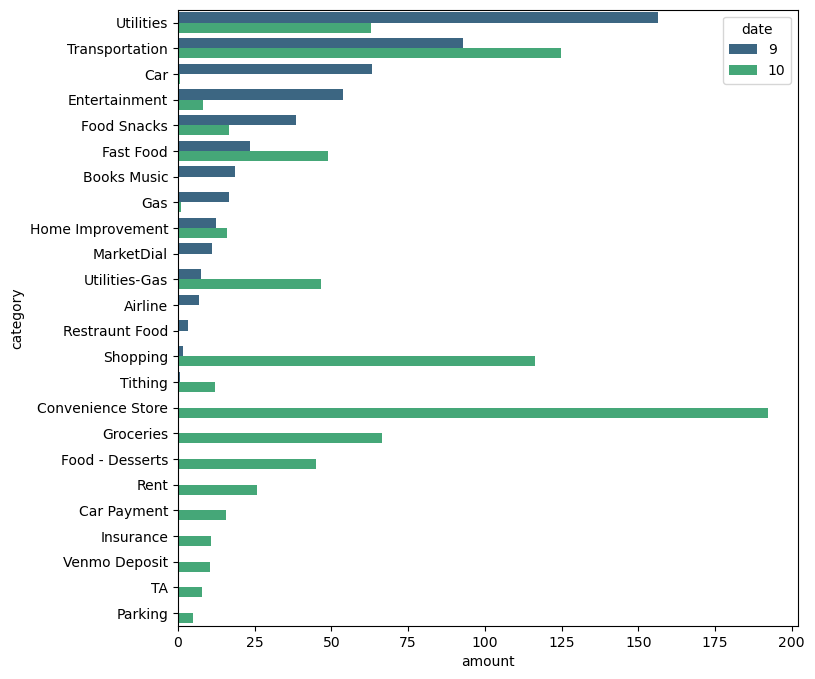

In [7]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(df.loc[(df['account'] == "Credit Card") & (df['category'] != "Credit Card Payment") & (df['date'].dt.month > 8)].groupby([ df['date'].dt.month,'category'])['amount'].mean().reset_index().sort_values(['date', 'amount'], ascending=[True, False]).reset_index(drop=True),
            x = 'amount', y = 'category', hue='date', palette='viridis')
plt.show()

In [94]:
sns.

,date,description,category,amount,account,balance
60,2023-10-31,WM SUPERCENTER,Groceries,66.36,Credit Card,2371.58
59,2023-10-30,LAZ PKG,Parking,4.77,Credit Card,2305.22
58,2023-10-29,UTAH FIRST CU,Car Payment,15.78,Credit Card,2300.45
57,2023-10-28,UTAH DMV OFFICES,Car,0.80,Credit Card,2284.67
56,2023-10-27,SALT & STRAW ICE CREA,Food - Desserts,45.14,Credit Card,2283.87
...,...,...,...,...,...,...
4,2023-09-05,AMERICAN AIR,Airline,6.93,Credit Card,252.83
3,2023-09-04,UTAH DMV OFFICES,Car,63.12,Credit Card,245.90
2,2023-09-03,PROVO CITY UTILI DES,Utilities,156.54,Credit Card,182.78
1,2023-09-02,SMITHS FUEL,Gas,24.74,Credit Card,26.24


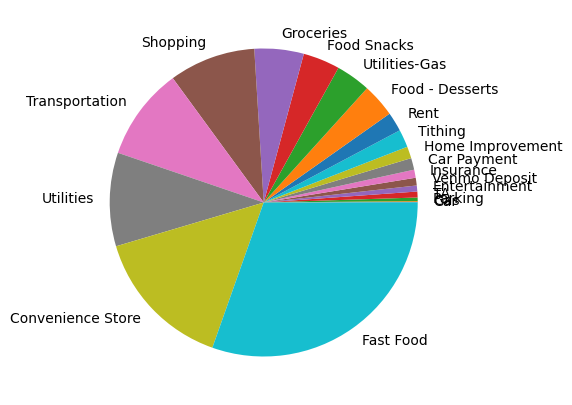

In [53]:
fig, ax = plt.subplots(figsize = (8,5))
ax.pie(credit_card_cat, labels = credit_card_cat.index)
plt.show()

In [41]:
df = pd.read_csv("transactions\\transactions.2023-10-21_to_2023-11-18.csv")
df.loc[df.index == 0, 'account'] = "k"

In [5]:


df = get_df_ready()



ImportError: cannot import name 'get_df_ready' from 'dashboard' (c:\Users\gmspr\Documents\School\Senior\Fall 2023\STAT 386\project\personal-budget-tool\dashboard.py)